Need to install pytesseract exe if not installed yet:
https://github.com/UB-Mannheim/tesseract/wiki#tesseract-installer-for-windows

In [2]:
!pip install --q numpy pandas opencv-python Pillow pytesseract
#!pip install easyocr
#!pip install pyperclip

#Colab
!apt install --q tesseract-ocr
!pip install --q pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (5,178 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [3]:
import numpy as np # numerical python
import pandas as pd
import matplotlib.pyplot as plt # visualze and display

import cv2 # opencv
from glob import glob # glob use to extract path of file
import os

import PIL
import pytesseract

#import pyperclip

from tqdm import tqdm

import re
import warnings
warnings.filterwarnings('ignore')
from PIL import Image

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
os.environ['TESSDATA_PREFIX'] = '/usr/share/tesseract-ocr/4.00/tessdata/'

In [ ]:
#Windows
#OCR. This needs to be edited based on Tesseract installation folder
#pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [7]:
path = glob('/content/drive/MyDrive/Colab Notebooks/FleetBlox/Face Recognition from ID Cards/data/images/*.jpg')

In [8]:
print('The number of images:', len(path))

The number of images: 11


In [26]:
### Step -1 Read Image and Convert to RGB
img = cv2.imread(path[6]) # read image in BGR
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # this step will convert image from BGR to RGB

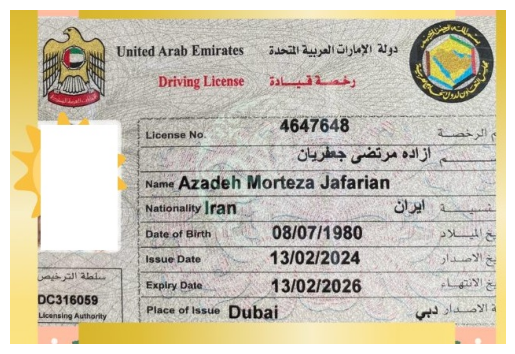

In [27]:
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

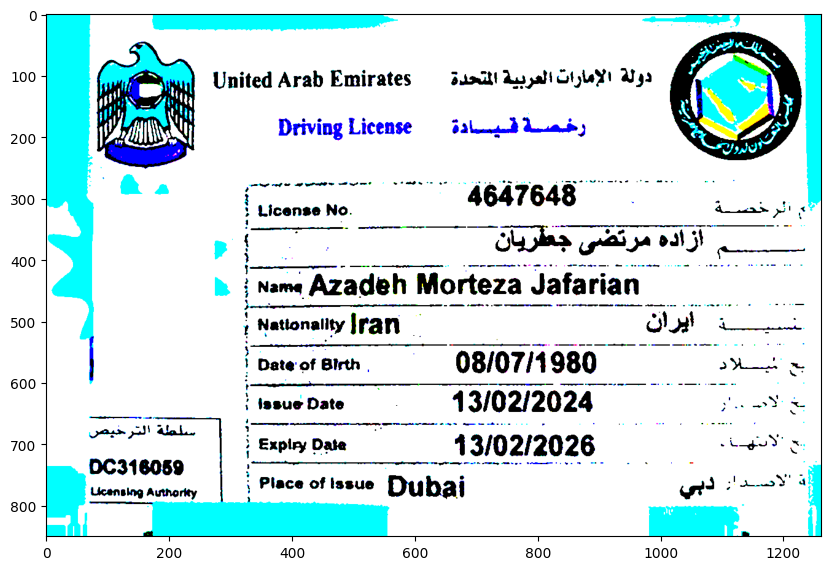

In [28]:
image_binary = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC) # make image larger image = cv2.cvtColor(image, cv2.COLORRGB2GRAY)
image_binary = cv2.threshold(image_binary, 130,255,cv2.THRESH_BINARY) [1]
image_binary = cv2.medianBlur(image_binary, 3)
plt.figure(figsize=(10,15))
plt.imshow(image_binary, cmap='gray', vmin=0, vmax=255)
plt.show()

In [29]:
# Replace 'your_image.jpg' with the path to your uploaded image
extracted_text_binary = pytesseract.image_to_string(image_binary,config=r'--oem 3 --psm 4')
print(extracted_text_binary)

= United Arab Emirates soni! dual Gtjbext Alga

Driving License sald dob)

 

poo gg aga

 

 

 

     
  

 

 

} License No. : dae pt x
> | Gg gina ata a | eal j} ——
bP Name ow Azadeh jeh Morteza Jafarian

(Rend Mori za Jafar

Fomeorenmn —OB/07/1980. |

7 rr

feolyowe 13/02/2026 HS

j Place of Issue Dubai

 



In [30]:
# Set Tesseract parameters
custom_config_4 = r'--oem 3 --psm 4'

# Perform OCR with custom configuration
extracted_text_4 = pytesseract.image_to_string(img, config=custom_config_4)
print(extracted_text_4)


    
  
 

  
 
   

United Arab Emirates ©. stadth Qyyal Gijbex! Uys

 
 

 

 

   
  

 

 

Ht © a
: Me MS Driving License 5a u¥2uo5;
— . a st
Me: 2 ai
wee meneael ee Jafarian—
. ' renee Bo
{Date of Birth 08/07/1980
: Issue Date ~ 4310212024 es a
| Expy Date 13/02/2026 _

iGawins bokalS



In [31]:
# Set Tesseract parameters
custom_config_11 = r'--oem 3 --psm 11'

# Perform OCR with custom configuration
extracted_text_11 = pytesseract.image_to_string(img, config=custom_config_11)
print(extracted_text_11)


United Arab Emirates

Sakoat a yall Giglay) Ags

Ya © My

Hai

Driving License

jrlLddaky

Hs

—— Ss

icense No.

pesecerslir)

oP

N35

ie ecareda shortest Jafarian

oe

Oba

a

Bate of Birth |

08/07/1980

pou

| Issue Date

13/02/2024

Gedneesre ceca Se

eae

| Expiry Date

Liga!

DC316059

13/02/2026 _

Lcensing Author

{ Place of issue. Dubai

el lata

i



## FINAL

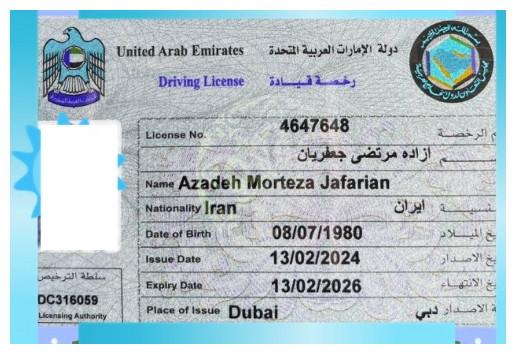

####################################################################################################
####################################################################################################
    
  
 

  
 
   

United Arab Emirates ©. stadth Qyyal Gijbex! Uys

 
 

 

 

   
  

 

 

Ht © a
: Me MS Driving License 5a u¥2uo5;
— . a st
Me: 2 ai
wee meneael ee Jafarian—
. ' renee Bo
{Date of Birth 08/07/1980
: Issue Date ~ 4310212024 es a
| Expy Date 13/02/2026 _

iGawins bokalS

####################################################################################################
####################################################################################################
United Arab Emirates

Sakoat a yall Giglay) Ags

Ya © My

Hai

Driving License

jrlLddaky

Hs

—— Ss

icense No.

pesecerslir)

oP

N35

ie ecareda shortest Jafarian

oe

Oba

a

Bate of Birth |

08/07/1980

pou

| Issue Date

13/02/2024

Gedneesre ceca Se

eae

| Expiry Date

Liga!

DC316059

13/02/2

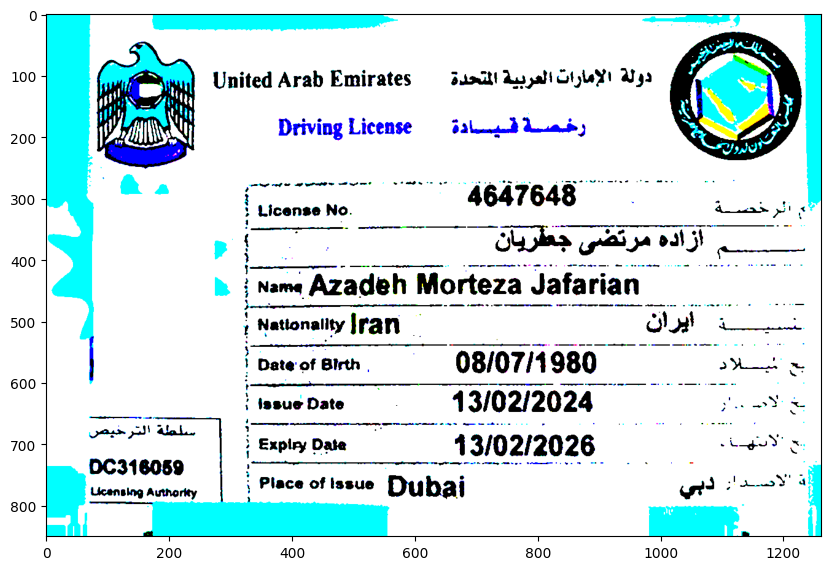

####################################################################################################
####################################################################################################
= United Arab Emirates soni! dual Gtjbext Alga

Driving License sald dob)

 

poo gg aga

 

 

 

     
  

 

 

} License No. : dae pt x
> | Gg gina ata a | eal j} ——
bP Name ow Azadeh jeh Morteza Jafarian

(Rend Mori za Jafar

Fomeorenmn —OB/07/1980. |

7 rr

feolyowe 13/02/2026 HS

j Place of Issue Dubai

 

####################################################################################################
COPY FROM BELOW
####################################################################################################
    
  
 

  
 
   

United Arab Emirates ©. stadth Qyyal Gijbex! Uys

 
 

 

 

   
  

 

 

Ht © a
: Me MS Driving License 5a u¥2uo5;
— . a st
Me: 2 ai
wee meneael ee Jafarian—
. ' renee Bo
{Date of Birth 08/07/1980
: Issue Date ~ 4310212024 es a
| Expy Date 1

In [33]:
img = cv2.imread(path[6]) # read image in BGR

plt.imshow(img)
plt.axis('off')
plt.show()
print("#"*100)
print("#"*100)

# Set Tesseract parameters
custom_config_4 = r'--oem 3 --psm 4'

# Perform OCR with custom configuration
extracted_text_4 = pytesseract.image_to_string(img, lang='eng', config=custom_config_4)
print(extracted_text_4)
print("#"*100)
print("#"*100)

# Set Tesseract parameters
custom_config_11 = r'--oem 3 --psm 11'

# Perform OCR with custom configuration
extracted_text_11 = pytesseract.image_to_string(img, lang='eng', config=custom_config_11)
print(extracted_text_11)
print("#"*100)
print("#"*100)

image_binary = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC) # make image larger image = cv2.cvtColor(image, cv2.COLORRGB2GRAY)
image_binary = cv2.threshold(image_binary, 130,255,cv2.THRESH_BINARY) [1]
image_binary = cv2.medianBlur(image_binary, 3)
plt.figure(figsize=(10,15))
plt.imshow(image_binary, cmap='gray', vmin=0, vmax=255)
plt.show()
print("#"*100)
print("#"*100)

# Replace 'your_image.jpg' with the path to your uploaded image
extracted_text_binary = pytesseract.image_to_string(image_binary, lang='eng', config=r'--oem 3 --psm 4')
print(extracted_text_binary)
print("#"*100)
print('COPY FROM BELOW')
print("#"*100)


combined_text = extracted_text_4 + extracted_text_11+extracted_text_binary
print(combined_text)